⊕ [7. Extracting Information from Text](http://www.nltk.org/book/ch07.html)


In [ ]:
import nltk
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), 
    ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

grammar = "NP: {<DT>?<JJ>*<NN>}" 

cp = nltk.RegexpParser(grammar) 
result = cp.parse(sentence) 
print(result) 

In [ ]:
import os
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame

# ⊕ [How do you make NLTK draw() trees that are inline in iPython/Jupyter - Stack Overflow](https://stackoverflow.com/questions/31779707/how-do-you-make-nltk-draw-trees-that-are-inline-in-ipython-jupyter)
def jupyter_draw_nltk_tree(tree):
    cf = CanvasFrame()
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp_tree_output.ps')
    cf.destroy()
    os.system('convert tmp_tree_output.ps tmp_tree_output.png')
    display(Image(filename='tmp_tree_output.png'))
    os.system('rm tmp_tree_output.ps tmp_tree_output.png')

In [1]:
import konlpy
import nltk

# POS tag a sentence
sentence = u'만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'
words = konlpy.tag.Okt().pos(sentence)

# Define a chunk grammar, or chunking rules, then chunk
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)
print("# Print whole tree")
print(chunks.pprint())

print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())

# Print whole tree
(S
  (NP 만/Noun 6/Number 세/Noun 이하/Noun)
  의/Josa
  (NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
  를/Josa
  (NP 양육/Noun)
  (VP 하기/Verb)
  (NP 위/Noun)
  (VP 해서는/Verb))
None

# Print noun phrases only
만 6 세 이하
(NP 만/Noun 6/Number 세/Noun 이하/Noun)
None
초등학교 취학 전 자녀
(NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
None
양육
(NP 양육/Noun)
None
위
(NP 위/Noun)
None


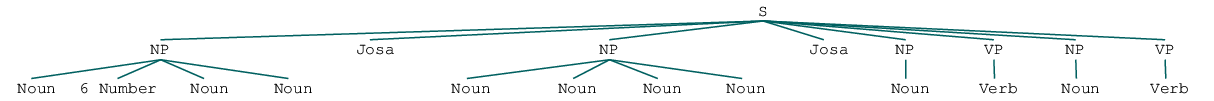

In [2]:
# Display the chunk tree
# chunks.draw()
# jupyter_draw_nltk_tree(chunks)
display(chunks)

In [ ]:
from nltk.tree import Tree
# from IPython.display import display

tree = Tree.fromstring('(S (NP this tree) (VP (V is) (AdjP pretty)))')
display(tree)

In [ ]:
display(chunks)

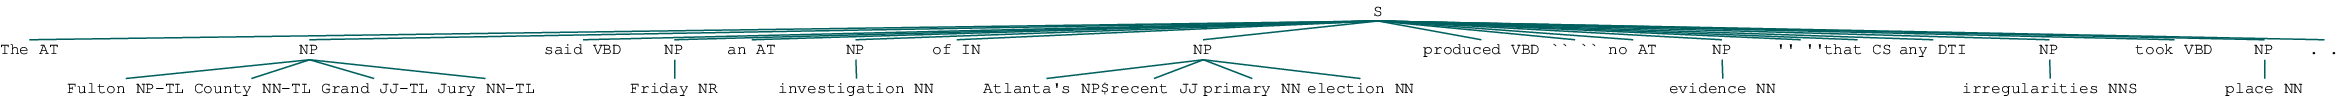

In [3]:
parser = nltk.RegexpParser(r'NP: {<[NJ].*>+}')
tree = parser.parse(nltk.corpus.brown.tagged_sents()[0])
display(tree)